# Introduction to Data Science

<div class="alert alert-block alert-success">
<b>Assignment 2: Regression - Iris Flowers
</div>

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from random import sample
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
# Creating pandas Dataframe
iris_df = pd.DataFrame(data= iris.data)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['species'] = target_df['species'].apply(converter)
iris_df = pd.concat([iris_df, target_df], axis= 1)
iris_df.columns = ['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width','species']
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_lenght  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_lenght  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_df

,sepal_lenght,sepal_width,petal_lenght,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Question 1: Plot (scatter plot matrix) the Iris flower dataset.

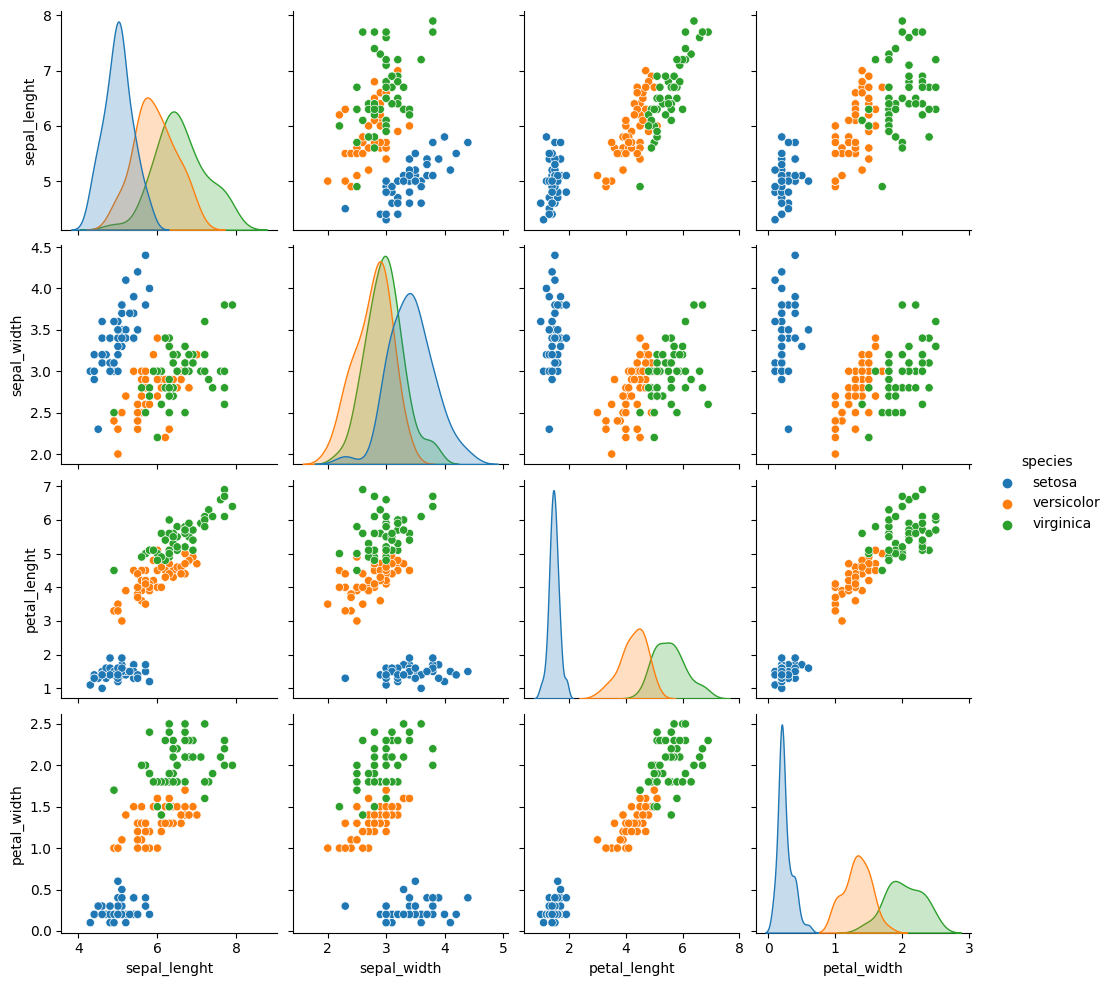

In [8]:
#Scatter plot matrix
spm = sns.pairplot(iris_df, kind ='scatter',hue='species')
plt.show()

>#### Use only two features: Petal Width and Petal Length. Please remove any other columns from the dataset.

In [9]:
iris_df = iris_df.drop(['sepal_lenght','sepal_width','species'], axis=1)
print(iris_df)

     petal_lenght  petal_width
0             1.4          0.2
1             1.4          0.2
2             1.3          0.2
3             1.5          0.2
4             1.4          0.2
..            ...          ...
145           5.2          2.3
146           5.0          1.9
147           5.2          2.0
148           5.4          2.3
149           5.1          1.8

[150 rows x 2 columns]


### Question 2: You will split the dataset into two sets: train and test set. You should first shuffle your data, and then split %70 of the dataset for training and %30 for testing

In [10]:
x= iris_df['petal_width']
y= iris_df['petal_lenght']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=66)

### Question 3: You will train a Linear Regression model that learns from the training set to predict the Petal Length (cm) of the Iris flowers. 

In [11]:
linear = LinearRegression()
linear.fit(x_train.values.reshape(-1, 1), y_train)


LinearRegression()

### Question 4: You will test your model on the test set, you will be computing and outputting two different metrics: the Mean Absolute Error and the Mean Squared Error. 

In [12]:
predict = linear.predict(x_test.values.reshape(-1, 1))
print('Mean Absolute Error:', mean_absolute_error(y_test, predict))
print('Mean Squared Error:', mean_squared_error(y_test, predict))

Mean Absolute Error: 0.38871389963085917
Mean Squared Error: 0.2722424700418642


### Question 5: You will pick a random flower from the test set, and output its features. Then, you should use the trained model to predict the petal length of this specific flower

In [13]:
x_df= pd.DataFrame(data= x_test)
y_df= pd.DataFrame(data= y_test)
test_df = pd.concat([x_df, y_df], axis=1, join='inner')
test_df = test_df.reset_index(drop=True)
test_df
#dataframe of test part

,petal_width,petal_lenght
0,1.3,4.3
1,1.4,4.8
2,1.5,4.6
3,0.3,1.7
4,1.3,4.6
5,1.2,4.2
6,0.2,1.4
7,0.2,1.4
8,0.1,1.1
9,1.6,5.8


In [14]:
#choose a flower
flower = test_df.sample(n=1)
flower_df= pd.DataFrame(data= flower)
flower_df

,petal_width,petal_lenght
4,1.3,4.6


In [15]:
value = flower['petal_lenght'].values[0]
print('Actual Petal Length:', y_test.iloc[flower.index[0]])
print('Predicted Petal Length:', predict[flower.index[0]])

Actual Petal Length: 4.6
Predicted Petal Length: 3.93035279570308


### Question 6: You will fit a polynomial of degree 1, basically a line, to the data using the polyfit() function from NumPy, and output the equation in the form of mx + b = y

In [16]:
width = iris_df.petal_width
lenght = iris_df.petal_lenght
model = np.polyfit(width, lenght, 1)
print(f"y = {model[0]}x + {model[1]}")

y = 2.2299404951218653x + 1.083558032850513


### Question 7: Plot the polynomial of degree (line) on a scatter plot that shows the data instances (Iris flowers) and their Petal Width and Petal Length values on the axes.

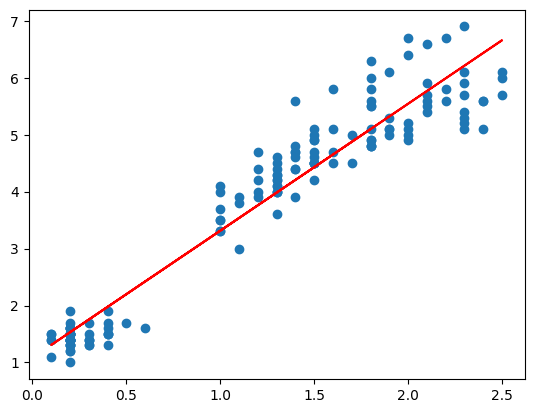

In [17]:
plt.scatter(width,lenght)
predict1d = np.poly1d(model)
y = predict1d(x)
plt.plot(x, y, c = 'r')
plt.show()
y= iris_df['petal_lenght']

### Question 8: Model the data using the parameters of the fitted straight line, and then compute and output the value of R², which measures how well the model (the straight line) fits the data

In [18]:
r2_score(y_test, predict)

0.9099659648750845

### Question 9: You will now fit a second-degree polynomial, basically a curve, to the data using the polyfit() function from NumPy, and output the equation in the form of ax2 + bx+ c = 0.

In [19]:
model2 = np.polyfit(width, lenght, 2)
print(f"y = {model2[0]}x^2 + {model2[1]}x + {model2[2]}")

y = -0.5276918247930916x^2 + 3.4548335349455273x + 0.6780834430199655


### Question 10: . Plot the second-degree polynomial (curve), on a scatter plot that shows the data instances (Iris flowers) and their Petal Width and Petal Length values on the axes.

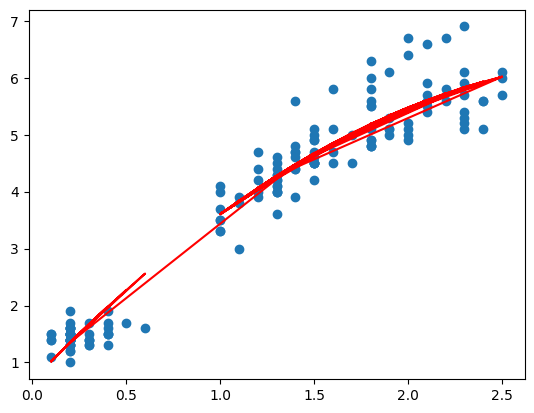

In [20]:
plt.scatter(width,lenght)
predict2d = np.poly1d(model2)
y = predict2d(x)
plt.plot(x, y, c = 'r')
plt.show()
y= iris_df['petal_lenght']